In [1]:
import h5py
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt

from mbipy.cupy.phase_retrieval import xsvt, csvt


with h5py.File("./data/BeLens.h5", "r") as f:
    sample = cp.asarray(f["50"]["sample"][:])
    reference = cp.asarray(f["50"]["reference"][:])
    sample = sample.astype(cp.float64) / np.iinfo(sample.dtype).max
    reference = reference.astype(cp.float64) / np.iinfo(reference.dtype).max

In [2]:
def plot_results(titles, results, figsize=None):
    assert len(titles) == len(results)
    size = len(results)
    fig = plt.figure(layout="constrained", figsize=figsize or (8, 8 * size))
    subfigs = fig.subfigures(size, 1, wspace=0.07)
    for i, j in enumerate(titles):
        subfigs[i].suptitle(j)

    for i, j in enumerate(results):
        axes = subfigs[i].subplots(1, 6)  # , sharex=True, sharey=True)
        im0 = axes[0].imshow(j[0].get())
        im1 = axes[1].imshow(j[1].get())
        plt.colorbar(im0, ax=axes[0], fraction=0.05, pad=0.04)
        plt.colorbar(im1, ax=axes[1], fraction=0.05, pad=0.04)
        axes[2].plot(j[0][460:470].mean(axis=0).get())
        axes[3].plot(j[1][460:470].mean(axis=0).get())
        axes[4].plot(j[0][:, 400:410].mean(axis=1).get())
        axes[5].plot(j[1][:, 400:410].mean(axis=1).get())

In [3]:
%%time
result_xsvt = xsvt(sample, reference, 7, 7)

CPU times: user 105 ms, sys: 21.5 ms, total: 126 ms
Wall time: 125 ms


In [4]:
%%time
result_csvt = csvt(sample, reference, 7, 7, cutoff=None)

CPU times: user 108 ms, sys: 4.67 ms, total: 113 ms
Wall time: 110 ms


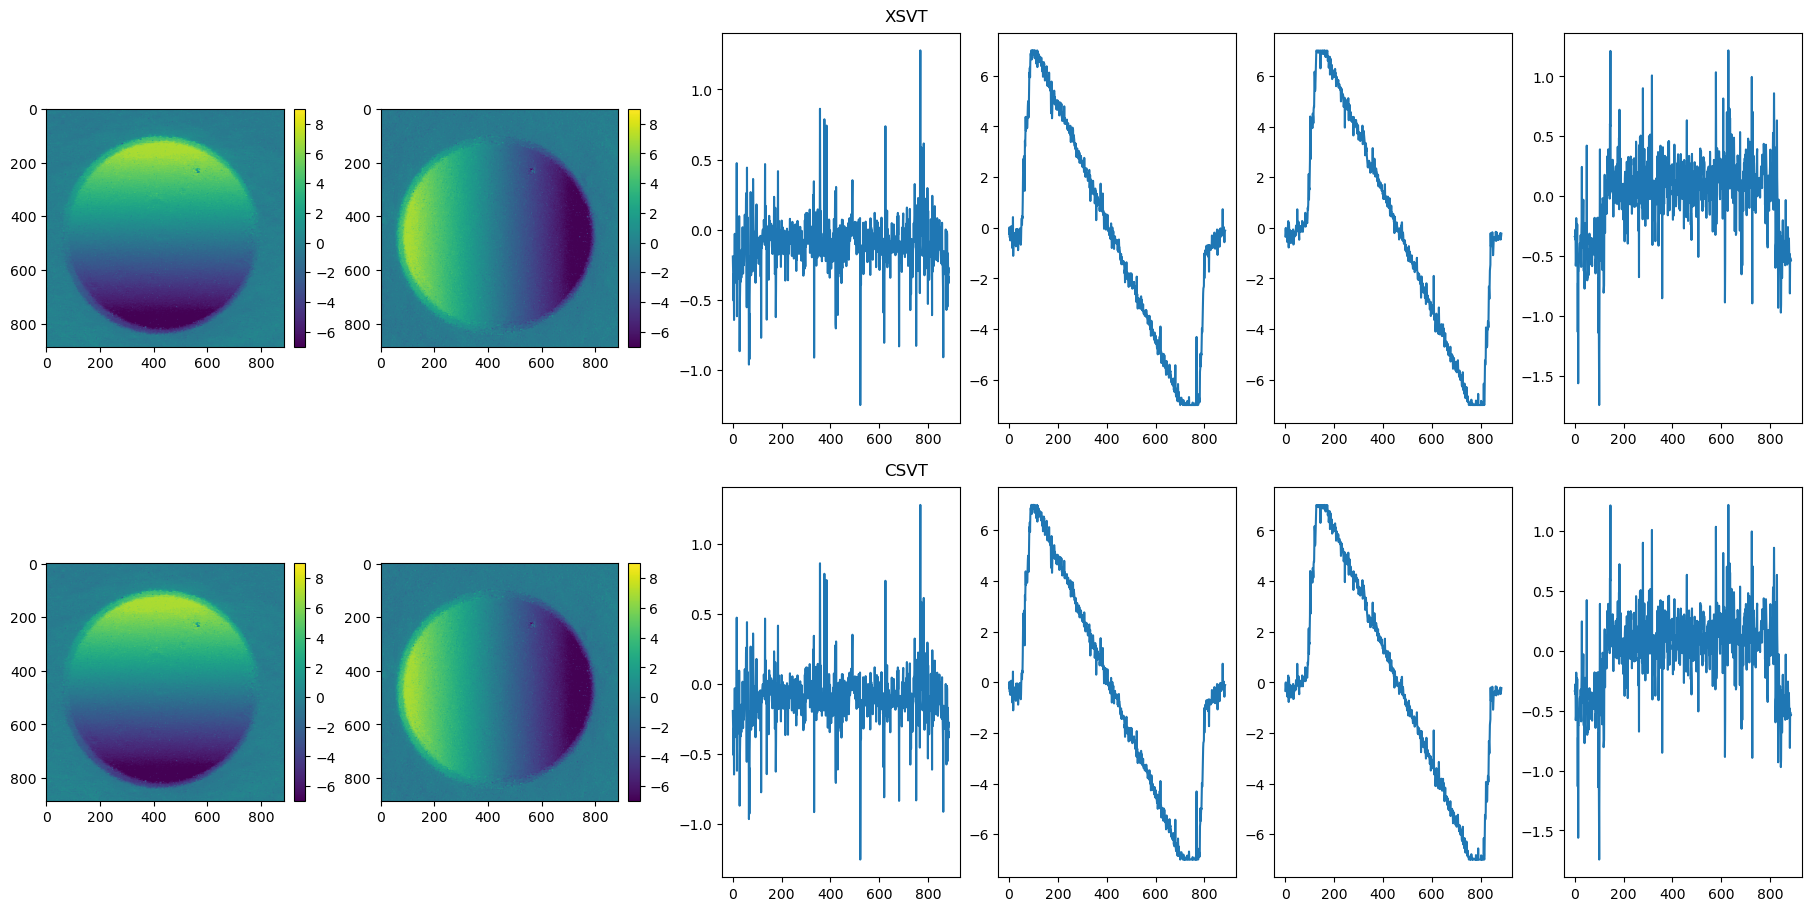

In [5]:
plot_results(("XSVT", "CSVT"), (result_xsvt, result_csvt), (18, 9))